# Visu Isolated nodes

In [1]:
import matplotlib.pyplot as plt 

In [2]:
datasets = [
    "CanParl", "USLegis", "Flights", "Trade", "UNVote", "Contact",
    "HepPh", "AS733", "Enron", "Colab", "SBM"
]

# Pourcentages d'isolated nodes par dataset
isolated_nodes = [
    54, 55, 67, 13, 35, 78,
    84, 59, 39, 27, 0
]

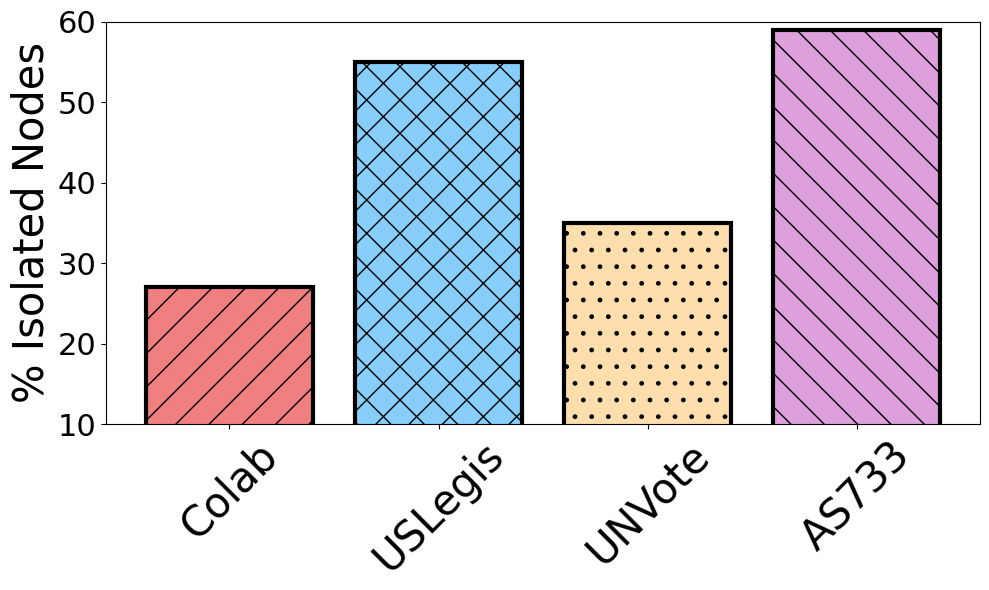

In [18]:
import matplotlib.pyplot as plt

selected_datasets = ["Colab", "USLegis", "UNVote", "AS733"]
selected_isolated_nodes = [27, 55, 35, 59]
patterns = ['/', 'x', '.', '\\']  # Motifs ajoutés
colors = ['lightcoral', 'lightskyblue', 'navajowhite', "plum"]

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(selected_datasets, selected_isolated_nodes, color=colors, edgecolor='black',
               linewidth=3., align='center', width=0.8)

# Ajouter des motifs aux barres
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Configuration des étiquettes et du titre
plt.ylabel('% Isolated Nodes', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=22)

# Configuration des étiquettes sur l'axe des abscisses
plt.xticks(rotation=45, ha='center', fontsize=30)

# Ajustement des paramètres d'affichage
plt.ylim(10, 60)  # Ajuster les limites de l'axe des y pour clarté

plt.tight_layout()
plt.show()


## Supra Laplacian encoding vs Spatial + Time 

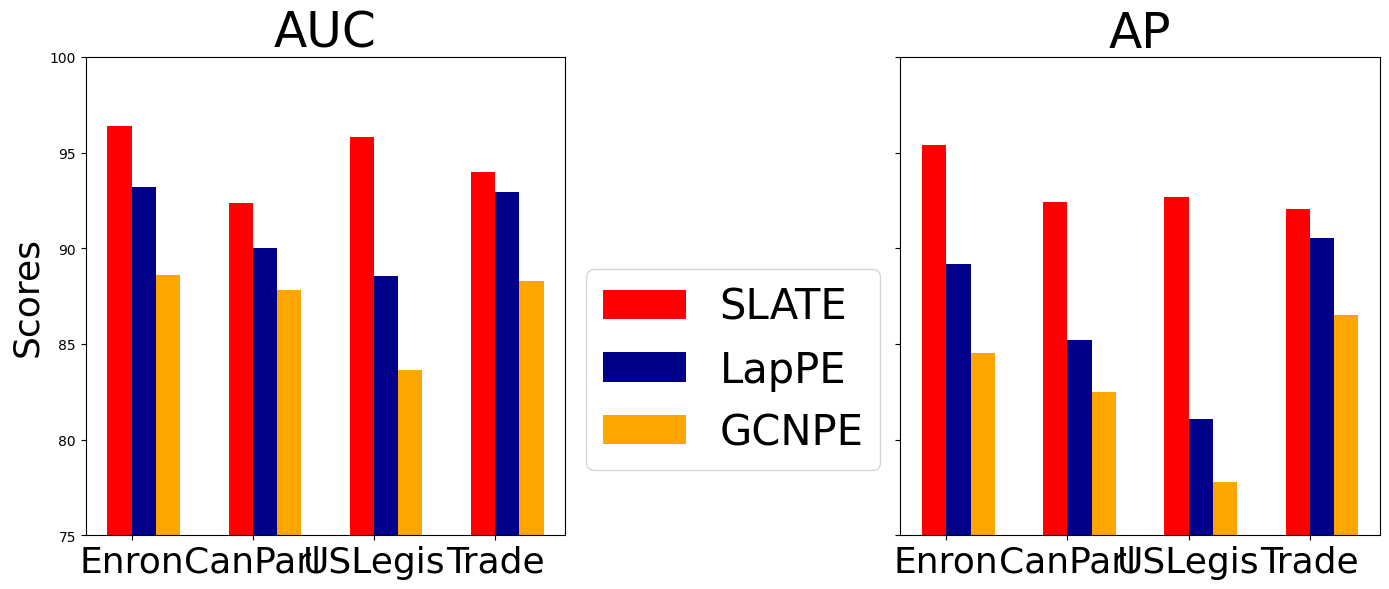

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ['Enron','CanParl', 'USLegis', 'Trade']

# AUC Scores
auc_scores = {
    'SLATE': [96.39,92.37, 95.80, 94.01],
    'LapPE': [93.20,90.02, 88.54, 92.93],
    'GCNPE': [88.61,87.81,83.65,88.27],
}

# AP Scores
ap_scores = {
    'SLATE': [95.40,92.44, 92.66, 92.06],
    'LapPE+TimePE': [89.18,85.22, 81.09, 90.56],
    'GCNPE+TimePE': [84.51,82.50,77.81,86.54],
}

# Colors for each method
colors = ['red', 'darkblue', 'orange', 'lightpurple']

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to add bars for each metric
def add_bars(ax, scores, title, datasets, colors,legend=False):
    n = len(datasets)
    ind = np.arange(n)
    width = 0.2
    
    for i, (label, vals) in enumerate(scores.items()):
        ax.bar(ind - width/2 + i*width, vals, width, label=label, color=colors[i])
    
    ax.set_title(title, fontsize=35)
    ax.set_xticks(ind)
    ax.set_xticklabels(datasets, fontsize=26)
    if legend:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 0.6), fontsize=30)

# Add bars for each subplot
add_bars(ax[0], auc_scores, 'AUC', datasets, colors,legend=True)
add_bars(ax[1], ap_scores, 'AP', datasets, colors)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax[0].set_ylabel('Scores', fontsize=26)
#ax[0].set_xlabel('Dataset', fontsize=16)
#ax[1].set_xlabel('Dataset', fontsize=16)
plt.ylim(75, 100)
plt.tight_layout()
plt.show()

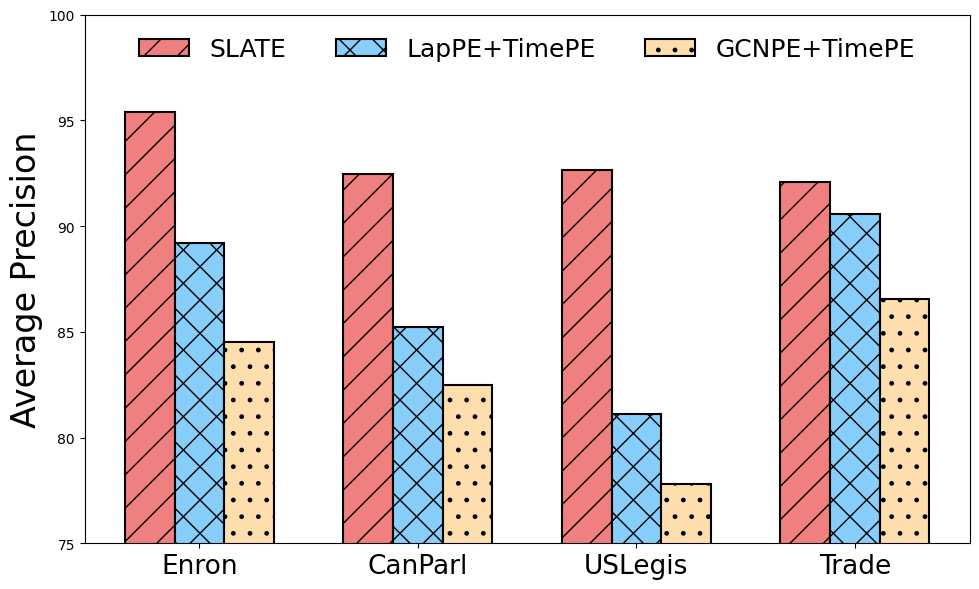

In [41]:
import matplotlib.pyplot as plt

# Dataset names
datasets = ['Enron', 'CanParl', 'USLegis', 'Trade']

# AP Scores
ap_scores = {
    'SLATE': [95.40, 92.44, 92.66, 92.06],
    'LapPE+TimePE': [89.18, 85.22, 81.09, 90.56],
    'GCNPE+TimePE': [84.51, 82.50, 77.81, 86.54],
}

# Modified colors for each method
colors = ['lightcoral', 'lightskyblue', 'navajowhite']
patterns = ['/', 'x', '.']  # Added patterns

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for better visibility

# Function to add bars for each metric
def add_bars(ax, scores, title, datasets, colors, patterns, legend=False):
    n = len(datasets)
    ind = np.arange(n) * 1.1  # Increase the spacing between groups of bars
    width = 0.25  # Adjust width to match the new spacing
    
    for i, (label, vals) in enumerate(scores.items()):
        ax.bar(ind + i * width, vals, width, label=label, color=colors[i], edgecolor='black', hatch=patterns[i], linewidth=1.5)
    
    ax.set_title(title, fontsize=24)
    ax.set_xticks(ind + width)  # Adjust xticks to align with the middle of the groups
    ax.set_xticklabels(datasets, fontsize=19)
    if legend:
        ax.legend(loc='upper center', fontsize=18, ncol=len(scores), frameon=False)

# Add bars for AP subplot
add_bars(ax, ap_scores, '', datasets, colors, patterns, legend=True)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Average Precision', fontsize=24)
plt.ylim(75, 100)
plt.tight_layout()
plt.show()